In [10]:
import pandas as pd

# Regression for Verbling position

In [11]:
verbling = pd.read_csv('../../data/model_ranking/verbling.csv', index_col=0)

In [12]:
verbling.shape

(2008, 10)

In [13]:
verbling.head()

,num_languages,speaks_english,gender_tuned,income_level,avg_lessons_per_students,num_ratings,avg_rating,price,first_letter,position
266,7,1,1,-1.150639,27.6,388,4.975806,-0.349526,0.52,1
2115,3,1,0,-0.970265,14.8,143,4.976923,-0.349526,0.52,1
2004,6,1,1,0.635734,19.7,292,5.000000,4.713507,0.12,1
1719,2,1,0,-0.621931,44.7,92,5.000000,-0.462038,0.72,1
152,5,1,1,-0.211400,11.4,698,4.998400,0.100522,0.44,1


In [14]:
verbling = verbling[['num_languages', 'speaks_english', 'gender_tuned', 'income_level', 'avg_lessons_per_students', 'num_ratings', 'avg_rating', 'price', 'first_letter', 'position']]
verbling.dropna(inplace=True)

In [15]:
X = verbling[['num_languages', 'gender_tuned', 'income_level', 'avg_lessons_per_students', 'num_ratings', 'avg_rating', 'price', 'first_letter']].values
y = verbling['position'].values

In [16]:
import matplotlib.pyplot as plt

verbling.corr().style.background_gradient(cmap='coolwarm')

,num_languages,speaks_english,gender_tuned,income_level,avg_lessons_per_students,num_ratings,avg_rating,price,first_letter,position
num_languages,1.000000,0.302423,-0.051298,-0.029909,0.049186,0.040638,0.057014,0.172106,0.005814,-0.100176
speaks_english,0.302423,1.000000,-0.017557,-0.027826,0.007605,0.004972,-0.017912,0.002417,-0.032546,-0.007982
gender_tuned,-0.051298,-0.017557,1.000000,-0.060915,0.023893,-0.053091,0.004704,0.104571,0.009124,-0.057453
income_level,-0.029909,-0.027826,-0.060915,1.000000,-0.056556,0.090622,0.060118,0.362622,-0.006188,0.112700
avg_lessons_per_students,0.049186,0.007605,0.023893,-0.056556,1.000000,0.188301,0.313253,0.108414,-0.005110,-0.047689
num_ratings,0.040638,0.004972,-0.053091,0.090622,0.188301,1.000000,0.159434,0.098847,-0.021463,-0.023111
avg_rating,0.057014,-0.017912,0.004704,0.060118,0.313253,0.159434,1.000000,0.049515,-0.033277,-0.029000
price,0.172106,0.002417,0.104571,0.362622,0.108414,0.098847,0.049515,1.000000,-0.004054,-0.095742
first_letter,0.005814,-0.032546,0.009124,-0.006188,-0.005110,-0.021463,-0.033277,-0.004054,1.000000,-0.032524
position,-0.100176,-0.007982,-0.057453,0.112700,-0.047689,-0.023111,-0.029000,-0.095742,-0.032524,1.000000


In [17]:
X

array([[ 7.        ,  1.        , -1.15063861, ...,  4.97580645,
        -0.34952577,  0.52      ],
       [ 3.        ,  0.        , -0.97026516, ...,  4.97692308,
        -0.34952577,  0.52      ],
       [ 6.        ,  1.        ,  0.63573392, ...,  5.        ,
         4.71350716,  0.12      ],
       ...,
       [ 4.        ,  0.        ,  0.10050793, ...,  5.        ,
        -0.01199024,  0.32      ],
       [ 1.        ,  1.        ,  0.10050793, ...,  0.        ,
        -0.57454946,  0.16      ],
       [ 2.        ,  1.        ,  0.10050793, ...,  0.        ,
        -0.57454946,  0.16      ]])

In [18]:
y

array([  1,   1,   1, ..., 544, 545, 546])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)

In [71]:
import seaborn as sns
def plot_regression(y_test, y_pred):
    plot_df = pd.DataFrame()
    plot_df['y_true'] = y_test
    plot_df['y_pred'] = y_pred
    sns.lmplot(x='y_true',y='y_pred', data=plot_df, fit_reg=True)

In [72]:
y_hat = lin_reg.predict(X_test)

In [73]:
y_hat[:3]

array([231.7441047 , 304.62696627, 224.41492248])

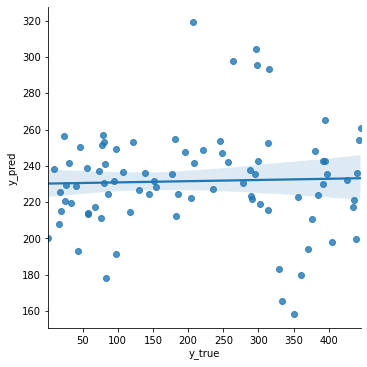

In [74]:
plot_regression(y_test, y_hat)

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

-0.04821209161109907

In [76]:
# XGBoost Regressor

In [77]:
import xgboost

In [78]:
xgb = xgboost.XGBRegressor(learning_rate=0.1,
                 max_depth=5,
                 n_estimators=60)

In [79]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_hat = xgb.predict(X_test)

In [81]:
y_hat[:3]

array([175.64099, 336.88443, 225.08585], dtype=float32)

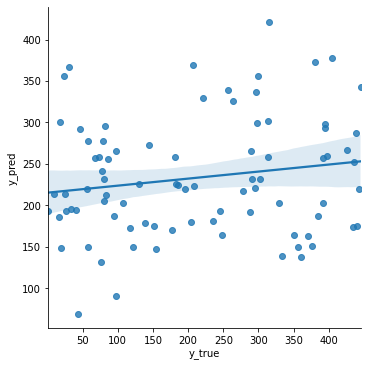

In [82]:
plot_regression(y_test, y_hat)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

-0.10904306388170726